In [10]:
import pandas as pd
import matplotlib.pyplot as plt


In [11]:
df = pd.read_csv("../data/raw/complaints.csv")


C:\Users\hp\AppData\Local\Temp\ipykernel_22716\902402444.py:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/raw/complaints.csv")


In [12]:
df.head()
df.shape
df.columns
df['Product'].value_counts()


Product
Credit reporting or other personal consumer reports                             4834855
Credit reporting, credit repair services, or other personal consumer reports    2163857
Debt collection                                                                  799197
Mortgage                                                                         422254
Checking or savings account                                                      291178
Credit card                                                                      226686
Credit card or prepaid card                                                      206369
Money transfer, virtual currency, or money service                               145066
Credit reporting                                                                 140429
Student loan                                                                     109717
Bank account or service                                                           86205
Vehicle loan or lease   

In [13]:
valid_products = [
    "Credit card",
    "Personal loan",
    "Savings account",
    "Money transfer"
]

df = df[df['Product'].isin(valid_products)]


In [14]:
df = df[df['Consumer complaint narrative'].notna()]
df = df[df['Consumer complaint narrative'].str.strip() != ""]


In [15]:
df['word_count'] = df['Consumer complaint narrative'].apply(lambda x: len(x.split()))
df['word_count'].describe()


count    80667.000000
mean       199.791674
std        223.183087
min          2.000000
25%         63.000000
50%        141.000000
75%        260.000000
max       6469.000000
Name: word_count, dtype: float64

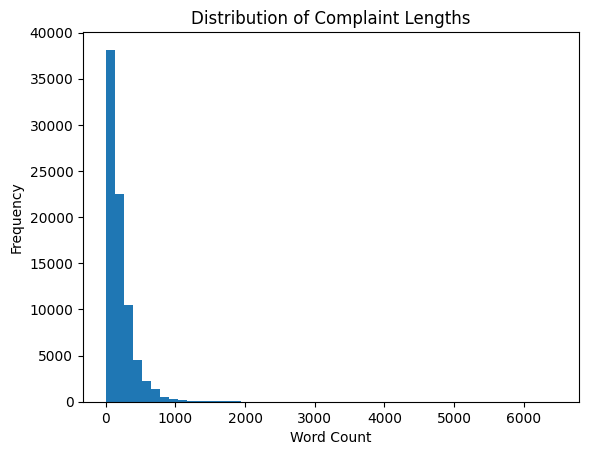

In [16]:
plt.hist(df['word_count'], bins=50)
plt.title("Distribution of Complaint Lengths")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()


In [17]:
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z0-9\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

df['clean_narrative'] = df['Consumer complaint narrative'].apply(clean_text)


In [18]:
df.to_csv("../data/processed/filtered_complaints.csv", index=False)
